# Compile and run 

Using data computed on Server

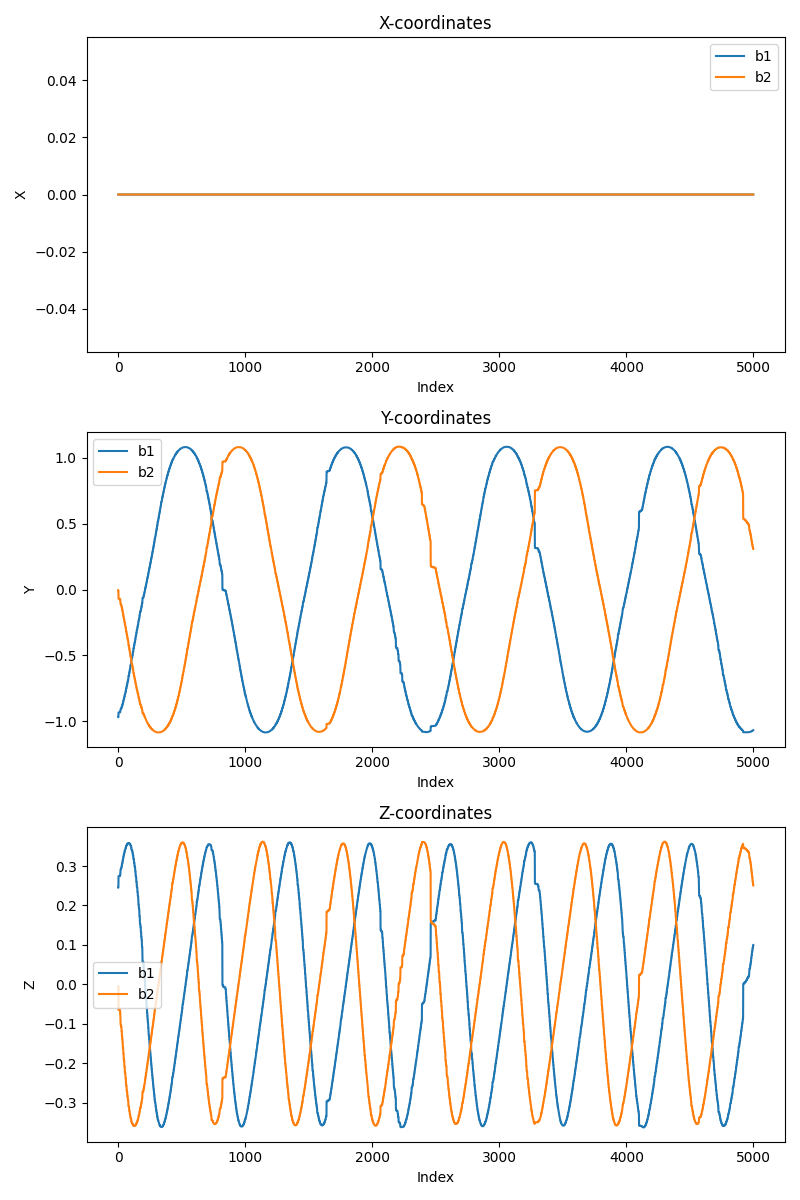

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def load_file(filename: str, nbline: int = 0, timestep: int = -1, param: list = []):
    with open(filename, "rb") as file:
        if timestep == -1:
            # Read the first 3 integers of the file (metadata)
            record_size = np.fromfile(file, dtype=np.int32, count=1)  # Skip record size marker
            metadata = np.fromfile(file, dtype=np.int32, count=3)    # Read metadata
            record_size = np.fromfile(file, dtype=np.int32, count=1)  # Skip end record marker
            return metadata
        else:
            # Validate 'param'
            if param is None or len(param) < 3:
                raise ValueError("Parameter list 'param' must include [num_particles, num_timesteps, float_precision].")
            
            num_particles, num_timesteps, float_precision = param
            dtype = np.float32 if float_precision == 4 else np.float64
            record_bytes = 4 + (num_particles * 3 * dtype().nbytes) + 4
            
            # Skip records before the desired timestep
            file.seek(4 + (record_bytes * timestep), 0)  # 4 bytes for record size + N records
            
            # Read the data for the timestep
            _ = np.fromfile(file, dtype=np.int32, count=1)  # Skip record size marker
            data = np.fromfile(file, dtype=dtype, count=num_particles * 3)  # Read positions
            _ = np.fromfile(file, dtype=np.int32, count=1)  # Skip end record marker
            
            # Reshape data into (3, nbline) format (x, y, z)
            data = data.reshape(3, nbline)
            return data
        


file = 'out_data/position.dat'
param = load_file(file)

xb1 = []
yb1 = []
zb1 = []
xb2 = []
yb2 = []
zb2 = []


for t in range(param[1]):
    data = load_file(file, param[0], t, param)

    xb1.append(data[0, 0])
    yb1.append(data[1, 0])
    zb1.append(data[2, 0])


    xb2.append(data[0, 1])
    yb2.append(data[1, 1])
    zb2.append(data[2, 1])


# Create a figure with 3 subplots (one for x, y, z)
fig, axes = plt.subplots(3, 1, figsize=(8, 12))  # 3 rows, 1 column

# Plot x-coordinates
axes[0].plot(xb1, label="b1")
axes[0].plot(xb2, label="b2")
axes[0].set_title("X-coordinates")
axes[0].set_xlabel("Index")
axes[0].set_ylabel("X")
axes[0].legend()

# Plot y-coordinates
axes[1].plot(yb1, label="b1")
axes[1].plot(yb2, label="b2")
axes[1].set_title("Y-coordinates")
axes[1].set_xlabel("Index")
axes[1].set_ylabel("Y")
axes[1].legend()

# Plot z-coordinates
axes[2].plot(zb1, label="b1")
axes[2].plot(zb2, label="b2")
axes[2].set_title("Z-coordinates")
axes[2].set_xlabel("Index")
axes[2].set_ylabel("Z")
axes[2].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()



/tmp/ipykernel_77640/4141323814.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


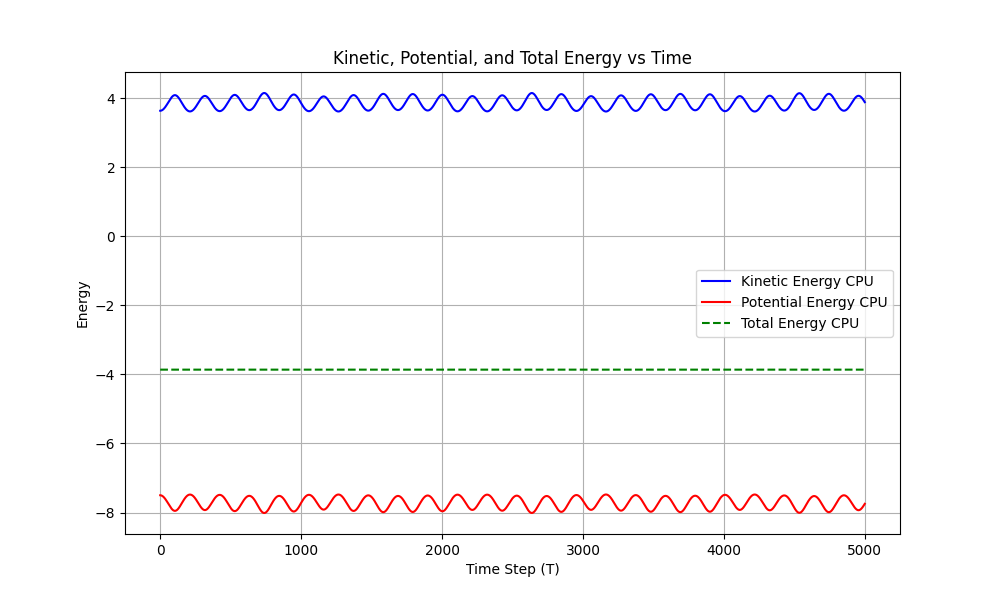

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# dilatation = 1e10
# # Distance 
# o_d = []
# for i in range(len(xb1)):
#     o_d.append(  1/ np.sqrt((xb1[i]-xb2[i])**2 + (yb1[i]-yb2[i])**2 + (zb1[i]-zb2[i])**2)  * dilatation)

# d = np.array(o_d)
# print(d)


# Load data from the file
data = np.loadtxt('out_data/energy.dat')
potential_energy = data[:, 0]
kinetic_energy = data[:, 1]
total_energy = kinetic_energy + potential_energy
plt.figure(figsize=(10, 6))


plt.plot(kinetic_energy, label='Kinetic Energy CPU', color='blue')
plt.plot(potential_energy, label='Potential Energy CPU', color='red')
plt.plot(total_energy, label='Total Energy CPU', color='green', linestyle='--')
plt.xlabel('Time Step (T)')
plt.ylabel('Energy')
plt.title('Kinetic, Potential, and Total Energy vs Time')




# Show legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

# compression = 1/1e2
# plt.figure(figsize=(10, 6))
# plt.plot(d, label='disance', color='black')
# plt.plot(total_energy*compression, label='Total Energy CPU', color='green', linestyle='--')
# plt.legend()
# plt.show()

# 3 body



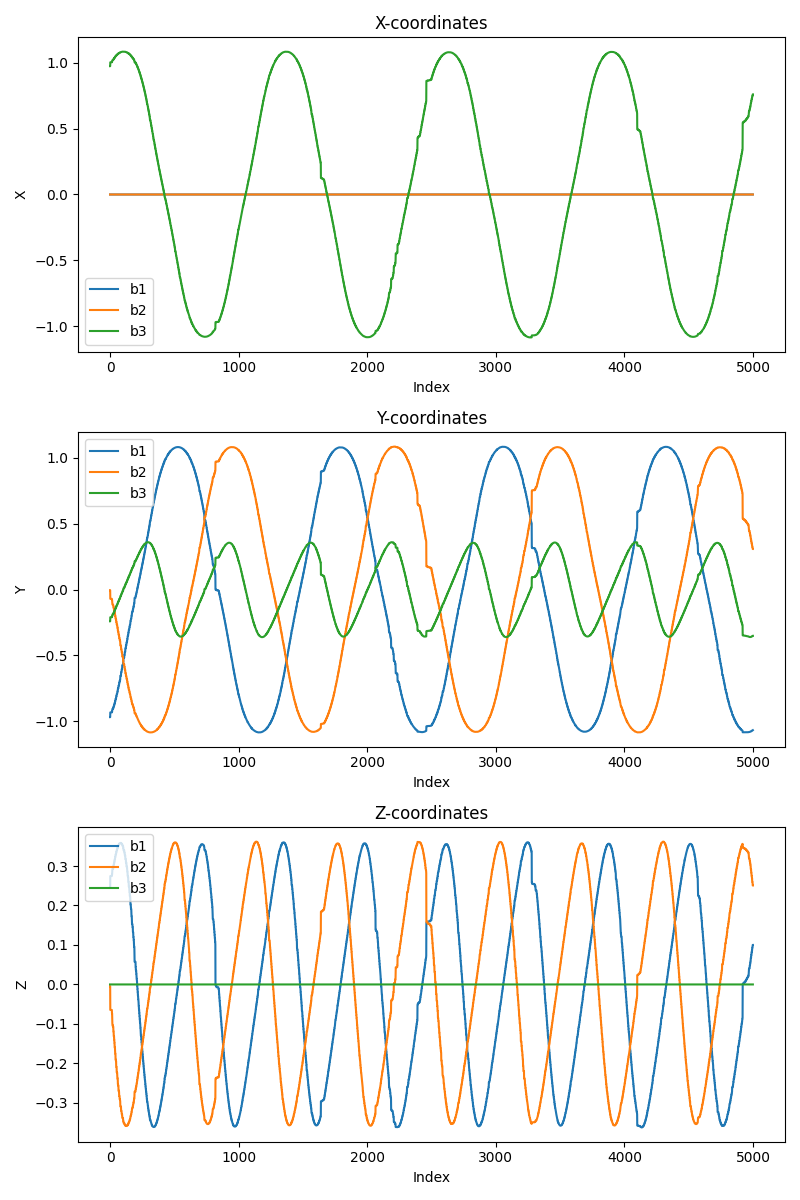

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def load_file(filename: str, nbline: int = 0, timestep: int = -1, param: list = []):
    with open(filename, "rb") as file:
        if timestep == -1:
            # Read the first 3 integers of the file (metadata)
            record_size = np.fromfile(file, dtype=np.int32, count=1)  # Skip record size marker
            metadata = np.fromfile(file, dtype=np.int32, count=3)    # Read metadata
            record_size = np.fromfile(file, dtype=np.int32, count=1)  # Skip end record marker
            return metadata
        else:
            # Validate 'param'
            if param is None or len(param) < 3:
                raise ValueError("Parameter list 'param' must include [num_particles, num_timesteps, float_precision].")
            
            num_particles, num_timesteps, float_precision = param
            dtype = np.float32 if float_precision == 4 else np.float64
            record_bytes = 4 + (num_particles * 3 * dtype().nbytes) + 4
            
            # Skip records before the desired timestep
            file.seek(4 + (record_bytes * timestep), 0)  # 4 bytes for record size + N records
            
            # Read the data for the timestep
            _ = np.fromfile(file, dtype=np.int32, count=1)  # Skip record size marker
            data = np.fromfile(file, dtype=dtype, count=num_particles * 3)  # Read positions
            _ = np.fromfile(file, dtype=np.int32, count=1)  # Skip end record marker
            
            # Reshape data into (3, nbline) format (x, y, z)
            data = data.reshape(3, nbline)
            return data
        


file = 'out_data/position.dat'
param = load_file(file)

xb1 = []
yb1 = []
zb1 = []

xb2 = []
yb2 = []
zb2 = []

xb3 = []
yb3 = []
zb3 = []

for t in range(param[1]):
    data = load_file(file, param[0], t, param)

    xb1.append(data[0, 0])
    yb1.append(data[1, 0])
    zb1.append(data[2, 0])


    xb2.append(data[0, 1])
    yb2.append(data[1, 1])
    zb2.append(data[2, 1])

    xb3.append(data[0, 2])
    yb3.append(data[1, 2])
    zb3.append(data[2, 2])


# Create a figure with 3 subplots (one for x, y, z)
fig, axes = plt.subplots(3, 1, figsize=(8, 12))  # 3 rows, 1 column

# Plot x-coordinates
axes[0].plot(xb1, label="b1")
axes[0].plot(xb2, label="b2")
axes[0].plot(xb3, label="b3")
axes[0].set_title("X-coordinates")
axes[0].set_xlabel("Index")
axes[0].set_ylabel("X")
axes[0].legend()

# Plot y-coordinates
axes[1].plot(yb1, label="b1")
axes[1].plot(yb2, label="b2")
axes[1].plot(yb3, label="b3")
axes[1].set_title("Y-coordinates")
axes[1].set_xlabel("Index")
axes[1].set_ylabel("Y")
axes[1].legend()

# Plot z-coordinates
axes[2].plot(zb1, label="b1")
axes[2].plot(zb2, label="b2")
axes[2].plot(zb3, label="b3")
axes[2].set_title("Z-coordinates")
axes[2].set_xlabel("Index")
axes[2].set_ylabel("Z")
axes[2].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()



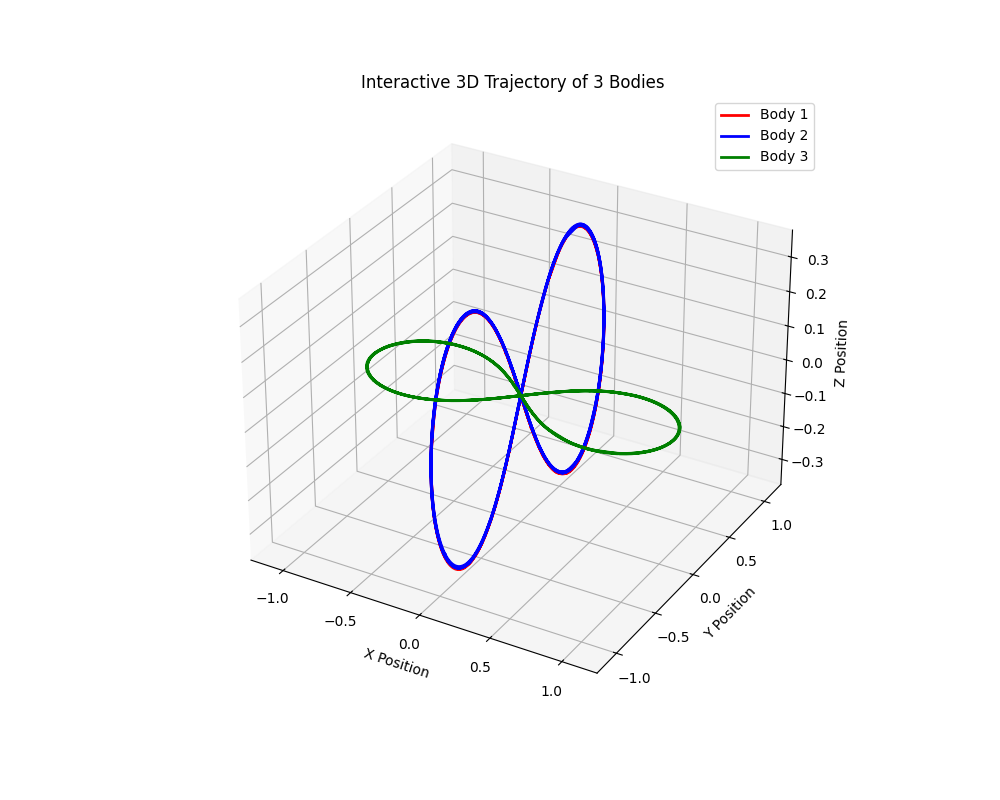

AttributeError: 'Canvas' object has no attribute 'key_press_event'

AttributeError: 'Canvas' object has no attribute 'key_press_event'

AttributeError: 'Canvas' object has no attribute 'key_release_event'

AttributeError: 'Canvas' object has no attribute 'key_release_event'

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Enable interactive plotting
# % matplotlib widget

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the trajectories for each body
ax.plot(xb1, yb1, zb1, label='Body 1', color='red', linewidth=2)
ax.plot(xb2, yb2, zb2, label='Body 2', color='blue', linewidth=2)
ax.plot(xb3, yb3, zb3, label='Body 3', color='green', linewidth=2)

# Add labels, legend, and title
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')
ax.set_title('Interactive 3D Trajectory of 3 Bodies')
ax.legend()

# Show the plot
plt.show()
